In [1]:
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

usage = pd.read_excel("C:/Users/joaqu/Desktop/ESTADISTICA INFORME/dfcombinado.xlsx")

In [2]:
df = usage[usage['student_id'].notna() & (usage['avg_try_step'] != 0)]
df.columns

Index(['Unnamed: 0', 'student_id', 'count_complete_content',
       'count_display_selection', 'avg_try_step', 'count_incorrect_attempts',
       'proportion_hints', 'count_last_hint_true', 'avg_time_per_step',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes', 'SE01_conf_aprender',
       'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
       'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario',
       'SE15R_cuesta_clases', 'SE06_entender_compleja',
       'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar',
       'SE10_identif_baches', 'SE16R_cuesta_comparacion',
       'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'],
      dtype='object')

## TRABAJO ORDENADO


                                count       mean         std       min  \
count_complete_content          178.0  17.617978   18.534137  0.000000   
count_display_selection         178.0  26.348315   23.379986  1.000000   
avg_try_step                    178.0   3.482881    2.030697  0.500000   
count_incorrect_attempts        178.0  86.061798   87.398765  0.000000   
proportion_hints                178.0   2.381737    3.146300  0.000000   
avg_time_per_step               178.0  25.430809   32.499017  0.000000   
avg_time_to_first_hint          178.0  93.521757  119.059645  0.000000   
more_difficult_changes          178.0   0.147613    0.158191  0.000000   
similar_difficulty_changes      178.0   0.195472    0.153123  0.000000   
easier_changes                  178.0   0.628796    0.195175  0.150000   
SE01_conf_aprender              178.0   4.674157    1.071197  2.000000   
SE02_autonomia_aprender         178.0   4.398876    1.136651  1.000000   
SE14R_cuesta_ejercicios         178.0 

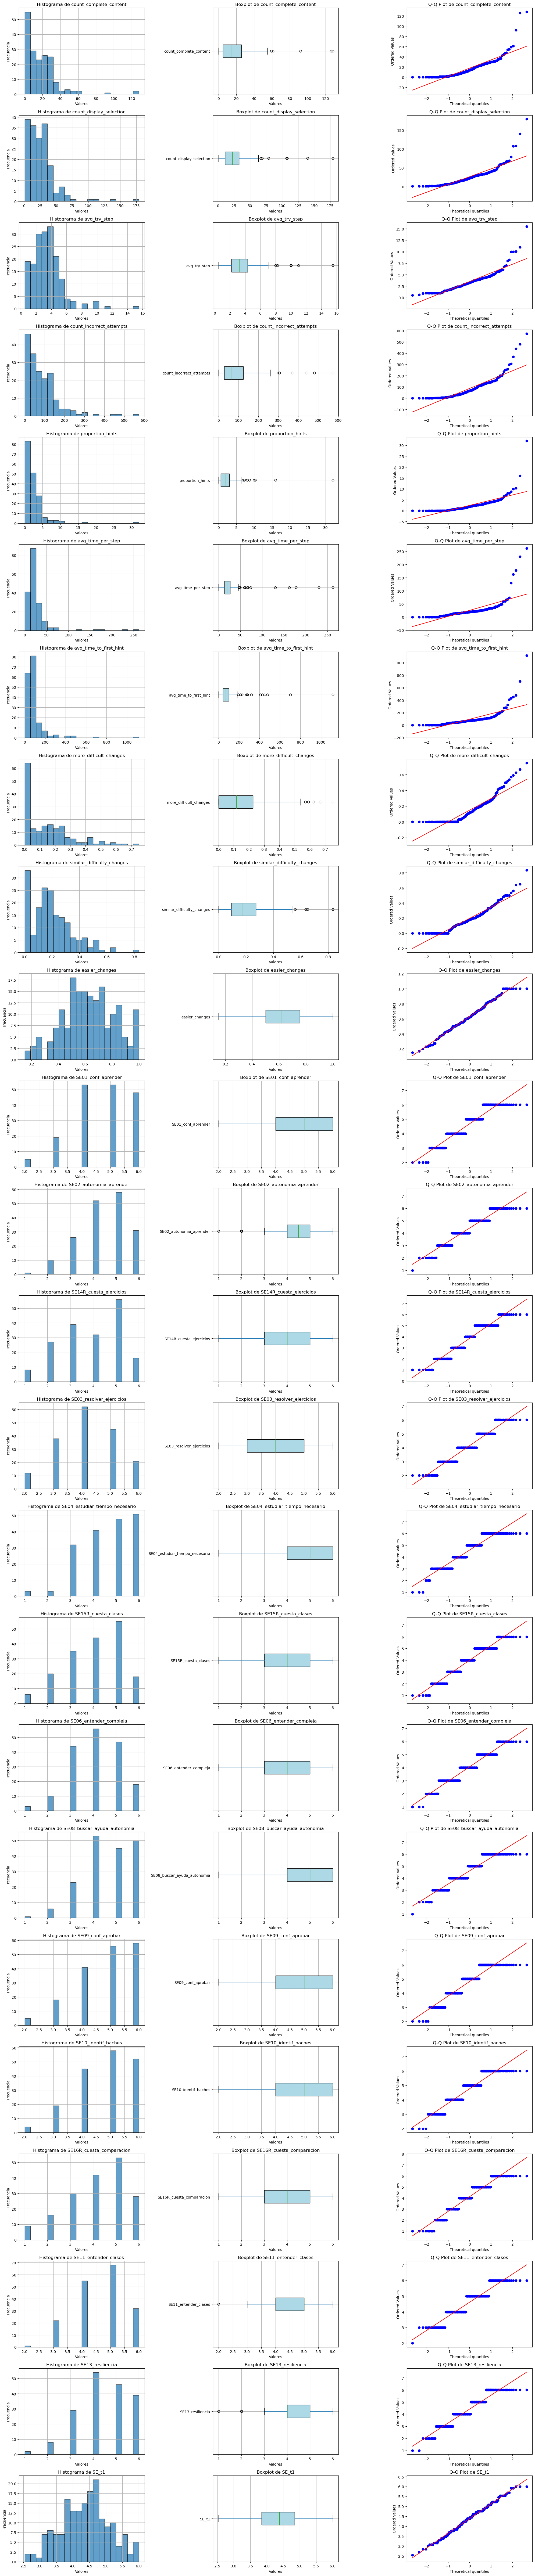

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lista de columnas a analizar
columns = [
    'count_complete_content',
    'count_display_selection', 'avg_try_step', 'count_incorrect_attempts',
    'proportion_hints', 'avg_time_per_step',
    'avg_time_to_first_hint', 'more_difficult_changes',
    'similar_difficulty_changes', 'easier_changes', 'SE01_conf_aprender', 
    'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios', 'SE03_resolver_ejercicios', 
    'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases', 'SE06_entender_compleja', 
    'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar', 'SE10_identif_baches', 
    'SE16R_cuesta_comparacion', 'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1'
]

# Verificar que las columnas existan en el DataFrame
columns = [col for col in columns if col in df.columns]

# Estadísticas descriptivas
stats_summary = df[columns].describe().T
stats_summary['variance'] = df[columns].var()
print(stats_summary)

# Configuración de gráficos (ajustar el tamaño de los gráficos)
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(20, len(columns)*4))  # Aumentamos la altura
axes = axes.flatten()

# Crear histogramas, boxplots y Q-Q plots
for i, col in enumerate(columns):
    # Histograma
    df[col].hist(ax=axes[3*i], bins=20, edgecolor='black', alpha=0.7)
    axes[3*i].set_title(f'Histograma de {col}')
    axes[3*i].set_xlabel('Valores')
    axes[3*i].set_ylabel('Frecuencia')

    # Boxplot
    df.boxplot(column=col, ax=axes[3*i+1], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[3*i+1].set_title(f'Boxplot de {col}')
    axes[3*i+1].set_xlabel('Valores')

    # Q-Q plot
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[3*i+2])
    axes[3*i+2].set_title(f'Q-Q Plot de {col}')

# Ajustar diseño
plt.tight_layout()

# Guardar los gráficos en un archivo (por ejemplo, como PNG)
plt.savefig('graficos_comportamiento.png', dpi=300)

# Mostrar los gráficos
plt.show()


In [4]:
import scipy.stats as stats
import pandas as pd

se_variables = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
    'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario', 
    'SE15R_cuesta_clases', 'SE06_entender_compleja', 
    'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar', 'SE10_identif_baches',
    'SE16R_cuesta_comparacion', 'SE11_entender_clases', 'SE13_resiliencia','SE_t1'
]

results = []

# Calcular la mediana de SE_t1 para dividir en grupos
mediana_se_t1 = df['SE_t1'].median()

# Dividir los datos en alta y baja autoeficacia basada en la mediana
high_efficacy = df[df['SE_t1'] > mediana_se_t1]
low_efficacy = df[df['SE_t1'] <= mediana_se_t1]

# Evaluar normalidad y homogeneidad para cada variable de autoeficacia
for se_var in se_variables:
    if se_var in df.columns:
        # Prueba de Shapiro-Wilk para normalidad (alto y bajo autoeficacia)
        stat_sw_high, p_sw_high = stats.shapiro(high_efficacy[se_var].dropna())
        stat_sw_low, p_sw_low = stats.shapiro(low_efficacy[se_var].dropna())

        # Prueba de Levene para homogeneidad de varianzas
        stat_levene, p_levene = stats.levene(
            high_efficacy[se_var].dropna(), 
            low_efficacy[se_var].dropna()
        )

        # Determinar el test a aplicar según los resultados
        test_to_apply = (
            "Paramétrico (t-test)" 
            if p_sw_high > 0.05 and p_sw_low > 0.05 and p_levene > 0.05 
            else "No paramétrico (Mann-Whitney U)"
        )

        # Guardar los resultados
        results.append({
            'Variable SE': se_var,
            'Shapiro-Wilk High (p-value)': p_sw_high,
            'Shapiro-Wilk Low (p-value)': p_sw_low,
            'Levene (p-value)': p_levene,
            'Test a utilizar': test_to_apply
        })

# Convertir los resultados en un DataFrame para visualizar
results_df = pd.DataFrame(results)
print(results_df)


                       Variable SE  Shapiro-Wilk High (p-value)  \
0               SE01_conf_aprender                 1.286414e-10   
1          SE02_autonomia_aprender                 3.853927e-08   
2          SE14R_cuesta_ejercicios                 1.288403e-07   
3         SE03_resolver_ejercicios                 9.270153e-07   
4   SE04_estudiar_tiempo_necesario                 3.989753e-10   
5              SE15R_cuesta_clases                 2.026789e-08   
6           SE06_entender_compleja                 1.624181e-06   
7      SE08_buscar_ayuda_autonomia                 1.381410e-09   
8                SE09_conf_aprobar                 3.057257e-11   
9              SE10_identif_baches                 6.785471e-11   
10        SE16R_cuesta_comparacion                 1.688259e-08   
11            SE11_entender_clases                 9.845091e-11   
12                SE13_resiliencia                 7.220715e-09   
13                           SE_t1                 2.391997e-0

In [5]:
mediana_se_t1

4.384615385

In [6]:
import scipy.stats as stats

# Lista de columnas de comportamiento
columnas_comportamiento = [
     'count_complete_content',
       'count_display_selection', 'avg_try_step', 'count_incorrect_attempts',
       'proportion_hints', 'avg_time_per_step',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes'
]

# Lista de columnas de autoeficacia
columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
    'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario', 
    'SE15R_cuesta_clases', 'SE06_entender_compleja', 
    'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar', 'SE10_identif_baches',
    'SE16R_cuesta_comparacion', 'SE11_entender_clases', 'SE13_resiliencia','SE_t1'
]

# Función para realizar las pruebas de dos muestras
def realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia):
    resultados = {}
    columnas_significativas = []  # Lista para guardar las columnas significativas

    # Iterar sobre las columnas de autoeficacia
    for col_auto in columnas_autoeficacia:
        # Calcular la mediana de la columna de autoeficacia
        mediana_autoeficacia = mediana_se_t1

        # Definir los grupos basados en la mediana
        grupo_bajo = df[df[col_auto] < mediana_autoeficacia]
        grupo_alto = df[df[col_auto] >= mediana_autoeficacia]
        
        # Comprobar que ambos grupos no estén vacíos antes de continuar
        if grupo_bajo.empty or grupo_alto.empty:
            continue
        
        # Evaluar las pruebas para cada columna de comportamiento
        for col_comport in columnas_comportamiento:
            # Obtener los datos de comportamiento de ambos grupos
            datos_bajo_comport = grupo_bajo[col_comport].dropna()
            datos_alto_comport = grupo_alto[col_comport].dropna()

            # Comprobar si los datos son normales usando la prueba de Shapiro-Wilk
            stat_bajo, p_bajo = stats.shapiro(datos_bajo_comport)
            stat_alto, p_alto = stats.shapiro(datos_alto_comport)

            # Evaluar normalidad y elegir la prueba estadística correspondiente
            if p_bajo > 0.05 and p_alto > 0.05:
                # Si ambos son normales, realizamos el t-test para dos muestras
                stat_t, p_t = stats.ttest_ind(datos_bajo_comport, datos_alto_comport, equal_var=False)
                test = "Two-Sample t-test"
            else:
                # Si no son normales, realizamos el test de Mann-Whitney (Wilcoxon)
                stat_mw, p_mw = stats.mannwhitneyu(datos_bajo_comport, datos_alto_comport)
                stat_t, p_t = stat_mw, p_mw
                test = "Mann-Whitney U test"
            
            # Solo guardamos e imprimimos los resultados si el p-valor es menor que 0.05
            if p_t < 0.05:
                if col_comport not in resultados:
                    resultados[col_comport] = []
                
                resultados[col_comport].append({
                    'autoeficacia_column': col_auto, 
                    'test': test, 
                    'p_value': p_t
                })
                
                # Agregar la columna a la lista de significativas si no está ya
                if col_comport not in columnas_significativas:
                    columnas_significativas.append(col_comport)
    
    return resultados, columnas_significativas

# Comparar las columnas de comportamiento entre los grupos bajos y altos de autoeficacia
resultados_comparaciones, columnas_significativas = realizar_pruebas(df, columnas_comportamiento, columnas_autoeficacia)

# Mostrar solo los resultados significativos
for col_comport, resultado in resultados_comparaciones.items():
    for r in resultado:
        print(f"{col_comport} | Autoeficacia columna: {r['autoeficacia_column']} | Test: {r['test']} | P-valor = {r['p_value']}")

# Imprimir las columnas de comportamiento significativas
print("\nColumnas de comportamiento significativas:")
print(columnas_significativas)


count_display_selection | Autoeficacia columna: SE08_buscar_ayuda_autonomia | Test: Mann-Whitney U test | P-valor = 0.03906292293029001
avg_try_step | Autoeficacia columna: SE08_buscar_ayuda_autonomia | Test: Mann-Whitney U test | P-valor = 0.04192433828371108
count_complete_content | Autoeficacia columna: SE10_identif_baches | Test: Mann-Whitney U test | P-valor = 0.04178454694393845

Columnas de comportamiento significativas:
['count_display_selection', 'avg_try_step', 'count_complete_content']


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Lista de columnas de comportamiento
columnas_comportamiento = [
    'count_complete_content', 'count_display_selection', 'avg_try_step', 
    'count_incorrect_attempts', 'proportion_hints', 'avg_time_per_step', 
    'avg_time_to_first_hint', 'more_difficult_changes', 
    'similar_difficulty_changes', 'easier_changes'
]

# Selección de datos de comportamiento
X = df[columnas_comportamiento].dropna()  # Asegúrate de no tener valores faltantes

# Normalizar los datos (opcional, pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el análisis factorial (PCA)
pca = PCA(n_components=5)  # Puedes elegir el número de componentes (factores) que deseas
X_pca = pca.fit_transform(X_scaled)

# Ver la varianza explicada por cada componente
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza acumulada: {pca.explained_variance_ratio_.cumsum()}')

# Mostrar las componentes principales (factores)
print(f'Componentes principales:\n{pca.components_}')

# Crear un DataFrame con los factores obtenidos
factores_df = pd.DataFrame(X_pca, columns=[f'Factor_{i+1}' for i in range(X_pca.shape[1])])

# Agregar los factores de PCA al DataFrame original
df = pd.concat([df, factores_df], axis=1)



Varianza explicada por cada componente: [0.30526963 0.21639526 0.16570075 0.11423036 0.10298551]
Varianza acumulada: [0.30526963 0.52166489 0.68736564 0.801596   0.90458151]
Componentes principales:
[[ 0.51865367  0.49228175  0.17789075  0.52590984  0.16840914  0.08105397
   0.05977695  0.12889676  0.24246749 -0.25791712]
 [-0.19631127 -0.18671561  0.44391776 -0.06493048  0.45840868  0.47068299
   0.49182534 -0.17721488  0.14005364  0.02696149]
 [-0.17469534 -0.24082562 -0.0500379  -0.21260079 -0.00815142  0.04664764
  -0.07145901  0.49923868  0.37785509 -0.68148302]
 [-0.06615588 -0.09186561  0.33730386 -0.03842426  0.39746785 -0.51215723
  -0.46955732 -0.33843307  0.34127314 -0.01263724]
 [-0.02201137 -0.08478573  0.41254483  0.08302914  0.27828703 -0.14737975
  -0.14651382  0.55865931 -0.61654729  0.04876732]]


In [8]:
df.columns

Index(['Unnamed: 0', 'student_id', 'count_complete_content',
       'count_display_selection', 'avg_try_step', 'count_incorrect_attempts',
       'proportion_hints', 'count_last_hint_true', 'avg_time_per_step',
       'avg_time_to_first_hint', 'more_difficult_changes',
       'similar_difficulty_changes', 'easier_changes', 'SE01_conf_aprender',
       'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
       'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario',
       'SE15R_cuesta_clases', 'SE06_entender_compleja',
       'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar',
       'SE10_identif_baches', 'SE16R_cuesta_comparacion',
       'SE11_entender_clases', 'SE13_resiliencia', 'SE_t1', 'Factor_1',
       'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'],
      dtype='object')

In [11]:
# Lista de columnas de autoeficacia
columnas_autoeficacia = [
    'SE01_conf_aprender', 'SE02_autonomia_aprender', 'SE14R_cuesta_ejercicios',
    'SE03_resolver_ejercicios', 'SE04_estudiar_tiempo_necesario', 'SE15R_cuesta_clases',
    'SE06_entender_compleja', 'SE08_buscar_ayuda_autonomia', 'SE09_conf_aprobar',
    'SE10_identif_baches', 'SE16R_cuesta_comparacion', 'SE11_entender_clases',
    'SE13_resiliencia'
]
mediana_se_t1 = df['SE_t1'].median()
    
for col in columnas_autoeficacia:
    # Crear una columna binaria basada en la mediana de 'SE_t1'
    df[f'{col}_binaria'] = np.where(df[col] >= mediana_se_t1, 1, 0)


# Ver los primeros registros del DataFrame con las nuevas columnas binarias
print(df['SE01_conf_aprender_binaria'])

0      1
1      1
2      0
4      1
5      1
      ..
159    0
161    0
167    0
171    0
173    0
Name: SE01_conf_aprender_binaria, Length: 217, dtype: int32


Distribución de y antes de train_test_split:
SE01_conf_aprender_binaria
0    78
1    78
Name: count, dtype: int64
Reporte para SE01_conf_aprender_binaria:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        16
           1       0.44      0.50      0.47        16

    accuracy                           0.44        32
   macro avg       0.44      0.44      0.44        32
weighted avg       0.44      0.44      0.44        32

Área bajo la curva (AUC) para SE01_conf_aprender_binaria: 0.4102
Matriz de confusión para SE01_conf_aprender_binaria:
[[ 6 10]
 [ 8  8]]


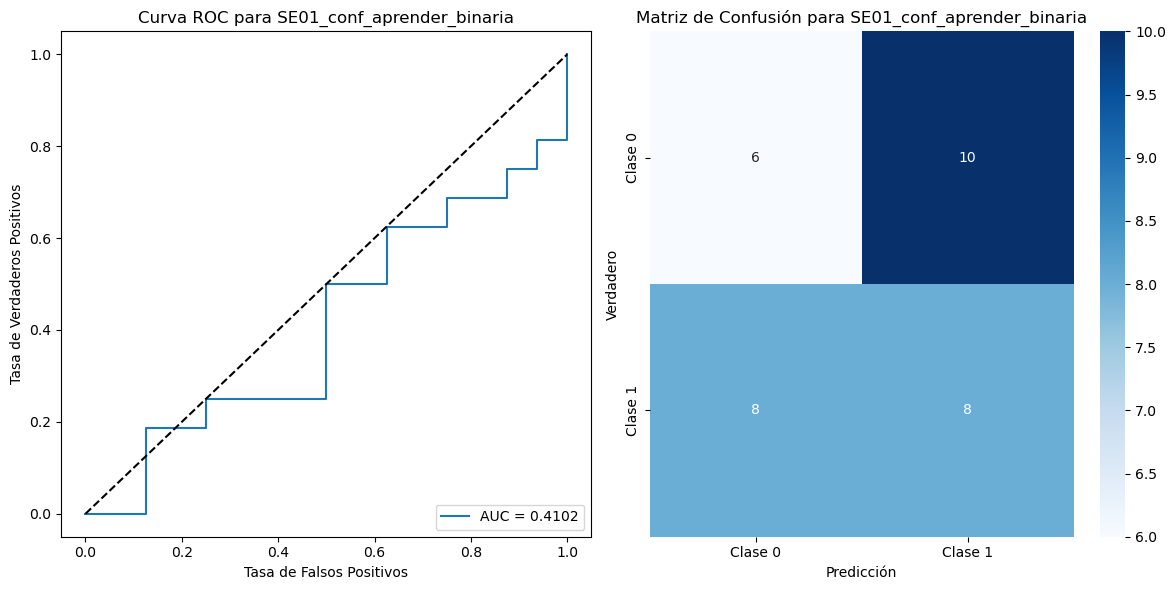

Distribución de y antes de train_test_split:
SE02_autonomia_aprender_binaria
0    71
1    71
Name: count, dtype: int64
Reporte para SE02_autonomia_aprender_binaria:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.69      0.64      0.67        14

    accuracy                           0.69        29
   macro avg       0.69      0.69      0.69        29
weighted avg       0.69      0.69      0.69        29

Área bajo la curva (AUC) para SE02_autonomia_aprender_binaria: 0.7667
Matriz de confusión para SE02_autonomia_aprender_binaria:
[[11  4]
 [ 5  9]]


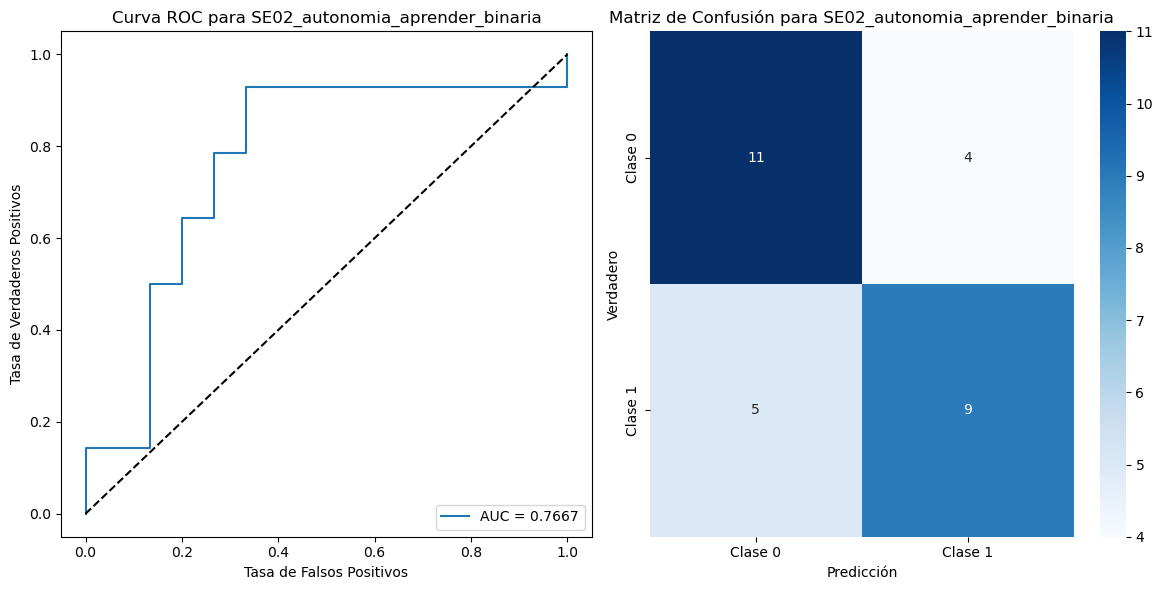

Distribución de y antes de train_test_split:
SE14R_cuesta_ejercicios_binaria
0    53
1    53
Name: count, dtype: int64
Reporte para SE14R_cuesta_ejercicios_binaria:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.55      0.55      0.55        11

    accuracy                           0.55        22
   macro avg       0.55      0.55      0.55        22
weighted avg       0.55      0.55      0.55        22

Área bajo la curva (AUC) para SE14R_cuesta_ejercicios_binaria: 0.4959
Matriz de confusión para SE14R_cuesta_ejercicios_binaria:
[[6 5]
 [5 6]]


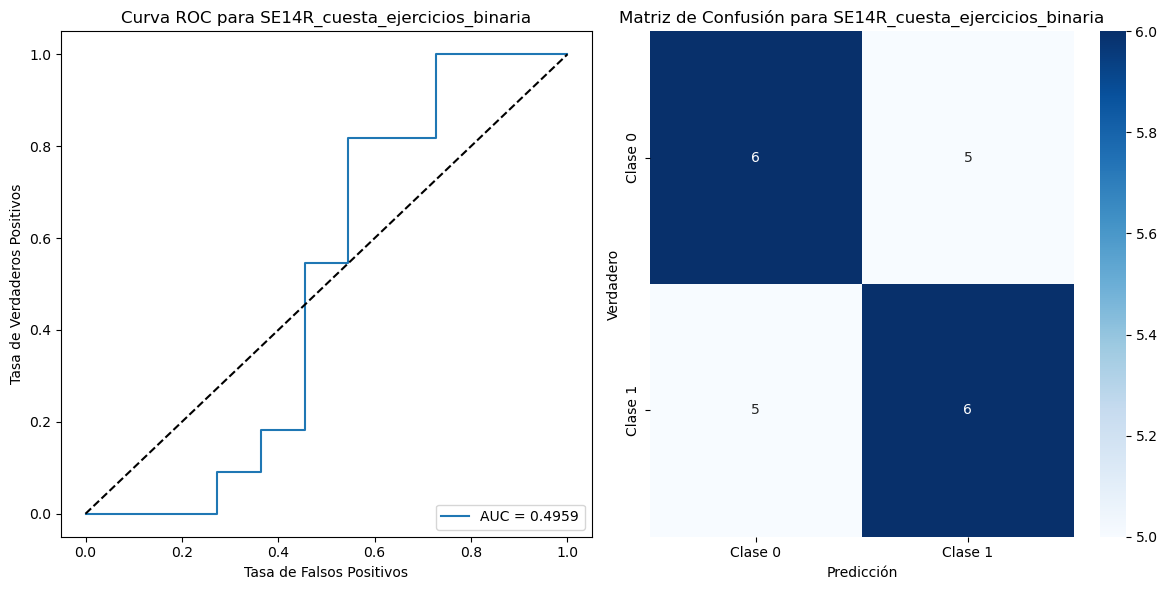

Distribución de y antes de train_test_split:
SE03_resolver_ejercicios_binaria
0    48
1    48
Name: count, dtype: int64
Reporte para SE03_resolver_ejercicios_binaria:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.54      0.70      0.61        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20

Área bajo la curva (AUC) para SE03_resolver_ejercicios_binaria: 0.6300
Matriz de confusión para SE03_resolver_ejercicios_binaria:
[[4 6]
 [3 7]]


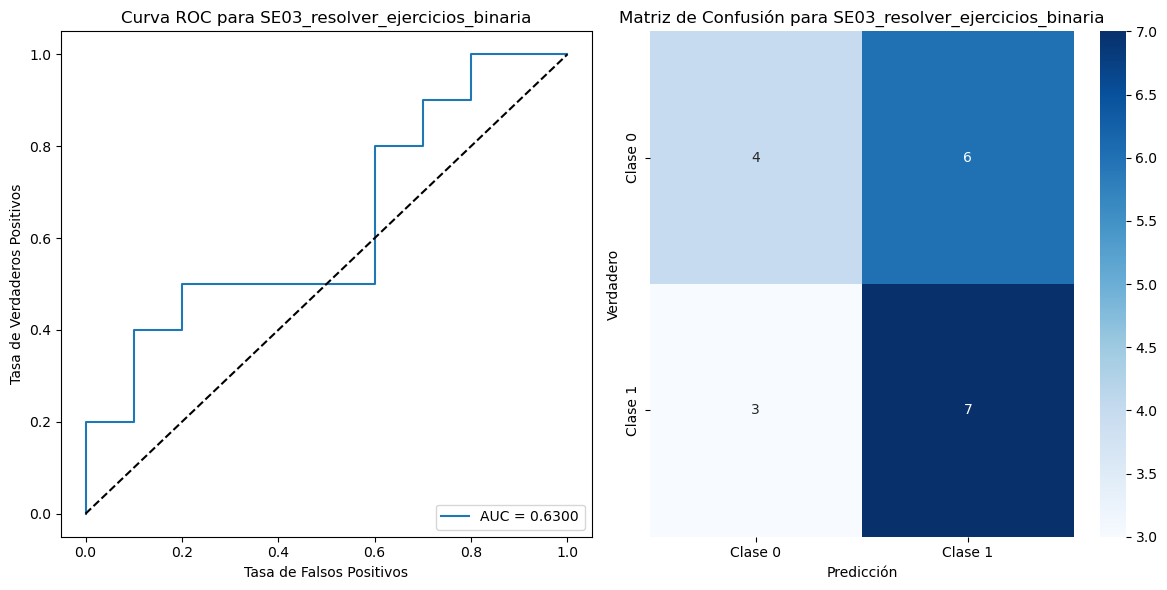

Distribución de y antes de train_test_split:
SE04_estudiar_tiempo_necesario_binaria
0    77
1    77
Name: count, dtype: int64
Reporte para SE04_estudiar_tiempo_necesario_binaria:
              precision    recall  f1-score   support

           0       0.46      0.38      0.41        16
           1       0.44      0.53      0.48        15

    accuracy                           0.45        31
   macro avg       0.45      0.45      0.45        31
weighted avg       0.45      0.45      0.45        31

Área bajo la curva (AUC) para SE04_estudiar_tiempo_necesario_binaria: 0.4833
Matriz de confusión para SE04_estudiar_tiempo_necesario_binaria:
[[ 6 10]
 [ 7  8]]


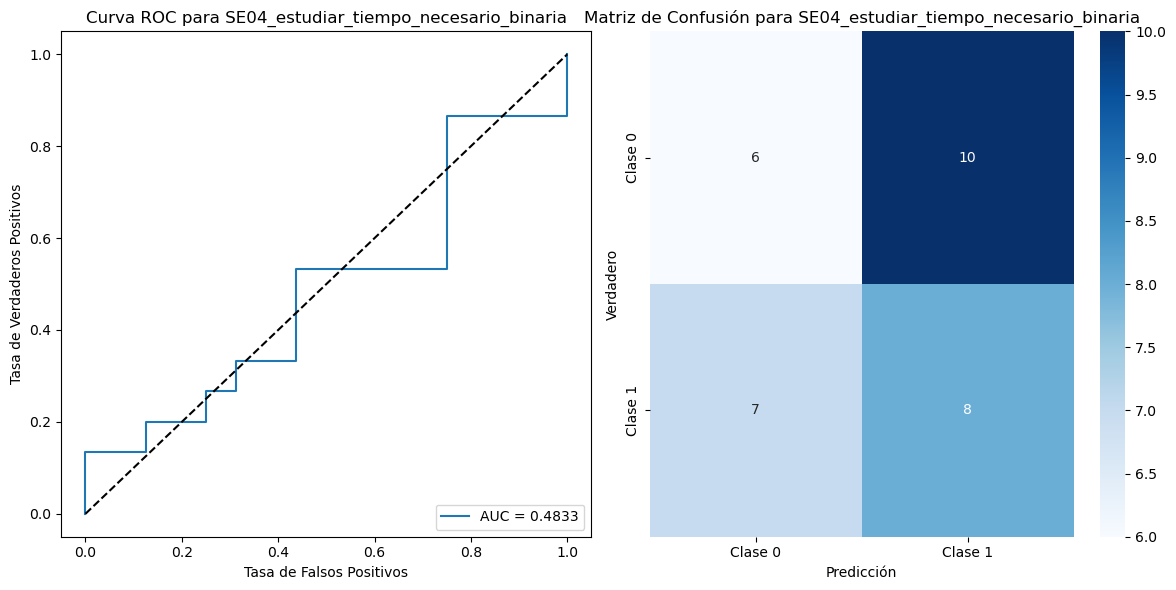

Distribución de y antes de train_test_split:
SE15R_cuesta_clases_binaria
0    57
1    57
Name: count, dtype: int64
Reporte para SE15R_cuesta_clases_binaria:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.50      0.64      0.56        11

    accuracy                           0.52        23
   macro avg       0.53      0.53      0.52        23
weighted avg       0.53      0.52      0.52        23

Área bajo la curva (AUC) para SE15R_cuesta_clases_binaria: 0.6364
Matriz de confusión para SE15R_cuesta_clases_binaria:
[[5 7]
 [4 7]]


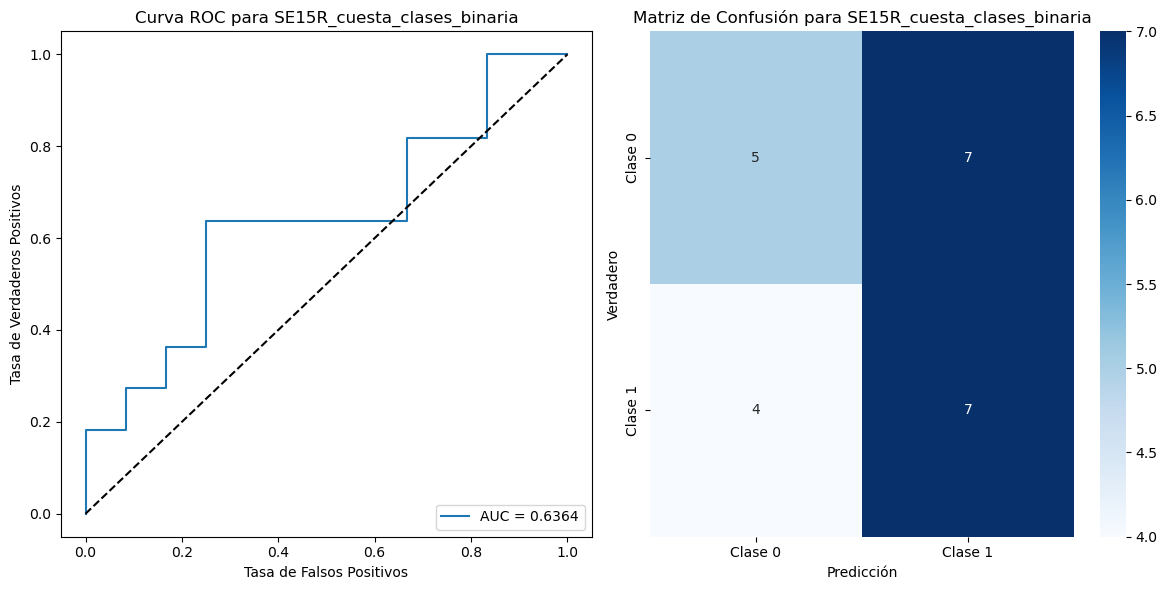

Distribución de y antes de train_test_split:
SE06_entender_compleja_binaria
0    52
1    52
Name: count, dtype: int64
Reporte para SE06_entender_compleja_binaria:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.47      0.80      0.59        10

    accuracy                           0.48        21
   macro avg       0.49      0.49      0.43        21
weighted avg       0.49      0.48      0.42        21

Área bajo la curva (AUC) para SE06_entender_compleja_binaria: 0.4909
Matriz de confusión para SE06_entender_compleja_binaria:
[[2 9]
 [2 8]]


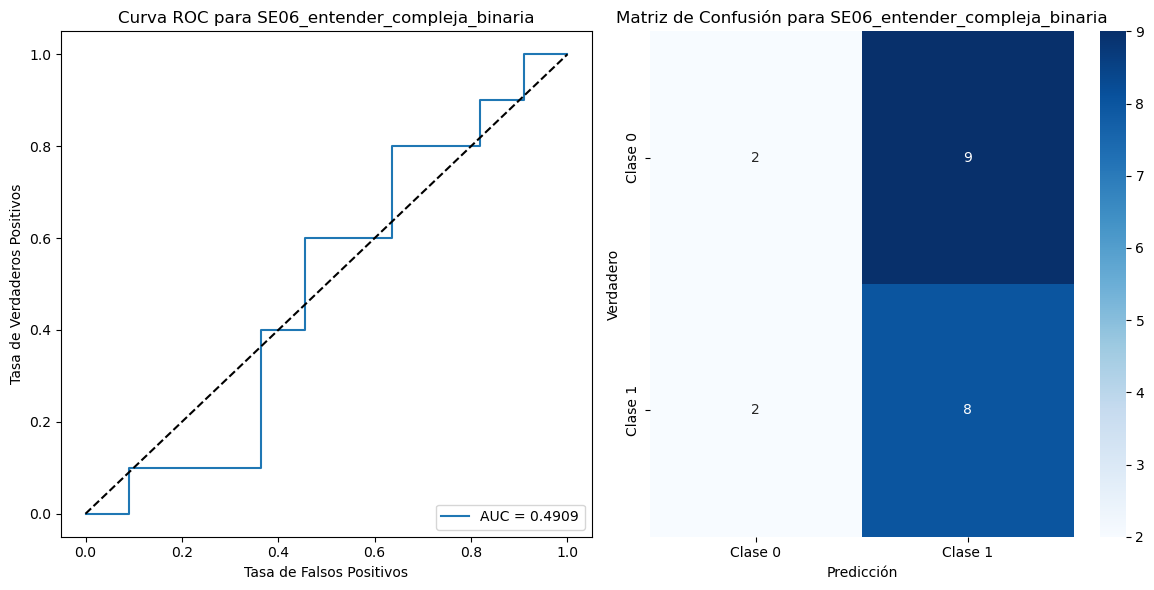

Distribución de y antes de train_test_split:
SE08_buscar_ayuda_autonomia_binaria
0    72
1    72
Name: count, dtype: int64
Reporte para SE08_buscar_ayuda_autonomia_binaria:
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        15
           1       0.56      0.36      0.43        14

    accuracy                           0.55        29
   macro avg       0.55      0.55      0.53        29
weighted avg       0.55      0.55      0.54        29

Área bajo la curva (AUC) para SE08_buscar_ayuda_autonomia_binaria: 0.5238
Matriz de confusión para SE08_buscar_ayuda_autonomia_binaria:
[[11  4]
 [ 9  5]]


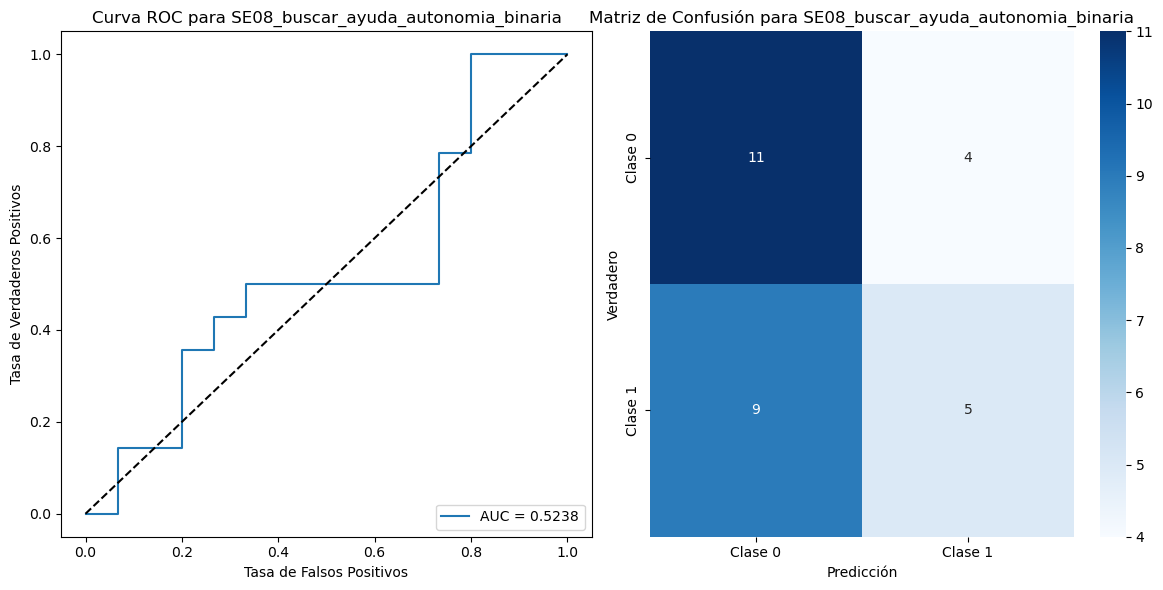

Distribución de y antes de train_test_split:
SE09_conf_aprobar_binaria
0    87
1    87
Name: count, dtype: int64
Reporte para SE09_conf_aprobar_binaria:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.63      0.71      0.67        17

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.66        35
weighted avg       0.66      0.66      0.66        35

Área bajo la curva (AUC) para SE09_conf_aprobar_binaria: 0.6340
Matriz de confusión para SE09_conf_aprobar_binaria:
[[11  7]
 [ 5 12]]


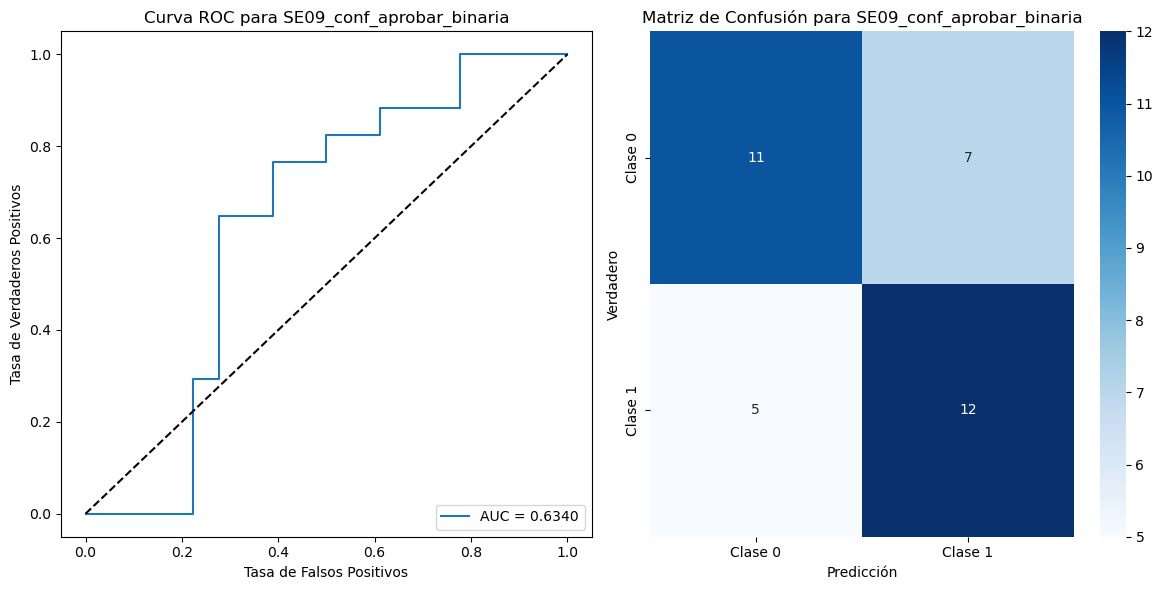

Distribución de y antes de train_test_split:
SE10_identif_baches_binaria
0    85
1    85
Name: count, dtype: int64
Reporte para SE10_identif_baches_binaria:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.50      0.59      0.54        17

    accuracy                           0.50        34
   macro avg       0.50      0.50      0.50        34
weighted avg       0.50      0.50      0.50        34

Área bajo la curva (AUC) para SE10_identif_baches_binaria: 0.4913
Matriz de confusión para SE10_identif_baches_binaria:
[[ 7 10]
 [ 7 10]]


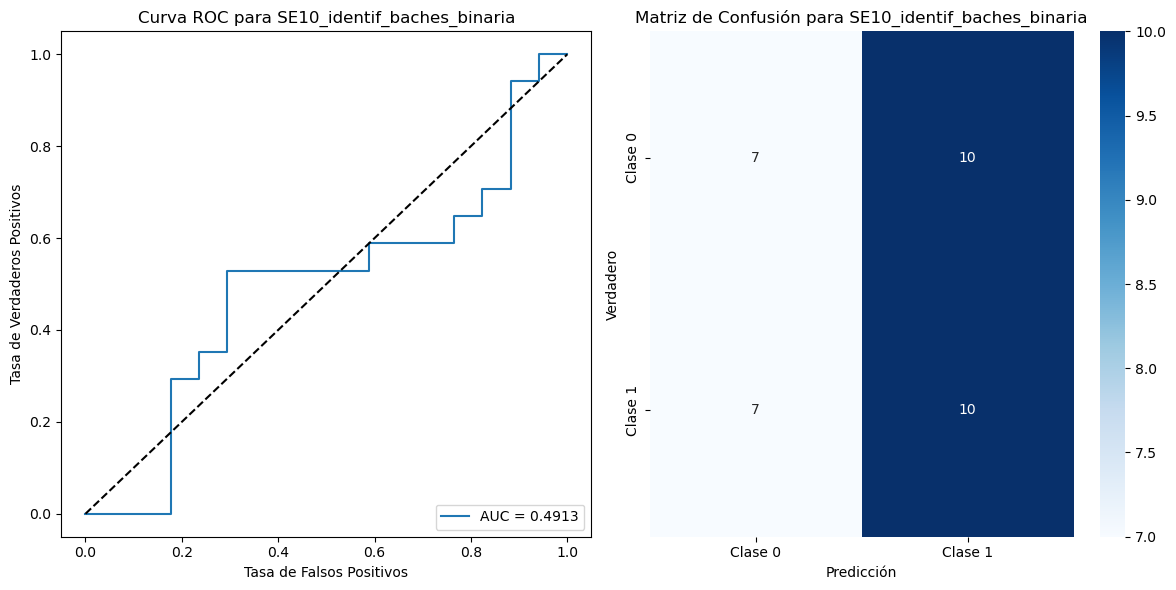

Distribución de y antes de train_test_split:
SE16R_cuesta_comparacion_binaria
0    61
1    61
Name: count, dtype: int64
Reporte para SE16R_cuesta_comparacion_binaria:
              precision    recall  f1-score   support

           0       0.59      0.77      0.67        13
           1       0.62      0.42      0.50        12

    accuracy                           0.60        25
   macro avg       0.61      0.59      0.58        25
weighted avg       0.61      0.60      0.59        25

Área bajo la curva (AUC) para SE16R_cuesta_comparacion_binaria: 0.6603
Matriz de confusión para SE16R_cuesta_comparacion_binaria:
[[10  3]
 [ 7  5]]


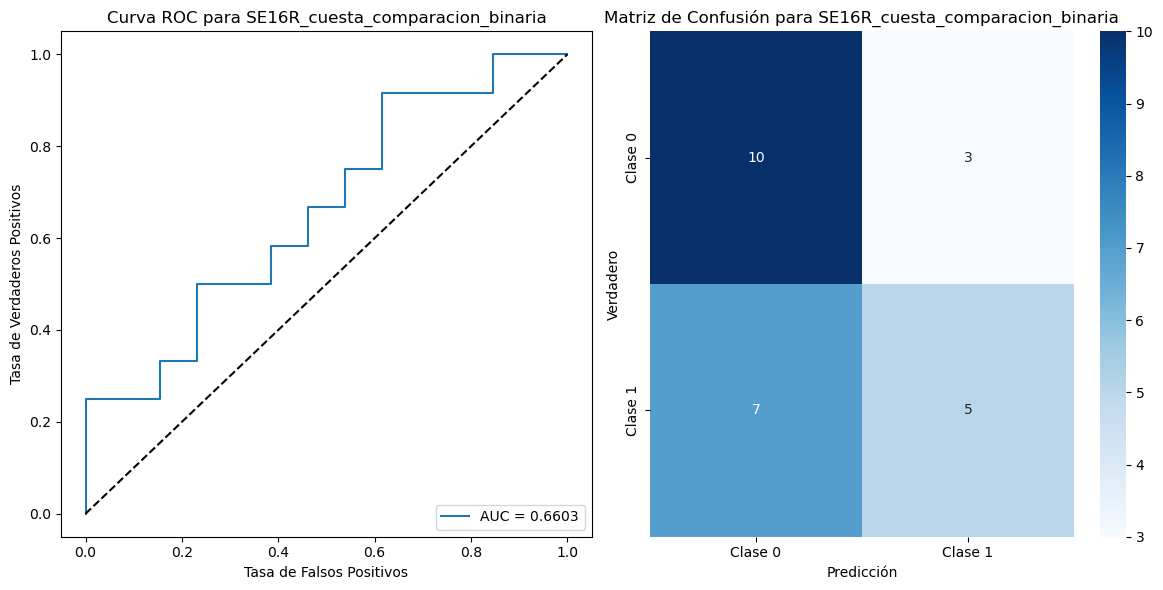

Distribución de y antes de train_test_split:
SE11_entender_clases_binaria
0    79
1    79
Name: count, dtype: int64
Reporte para SE11_entender_clases_binaria:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        16
           1       0.53      0.56      0.55        16

    accuracy                           0.53        32
   macro avg       0.53      0.53      0.53        32
weighted avg       0.53      0.53      0.53        32

Área bajo la curva (AUC) para SE11_entender_clases_binaria: 0.5938
Matriz de confusión para SE11_entender_clases_binaria:
[[8 8]
 [7 9]]


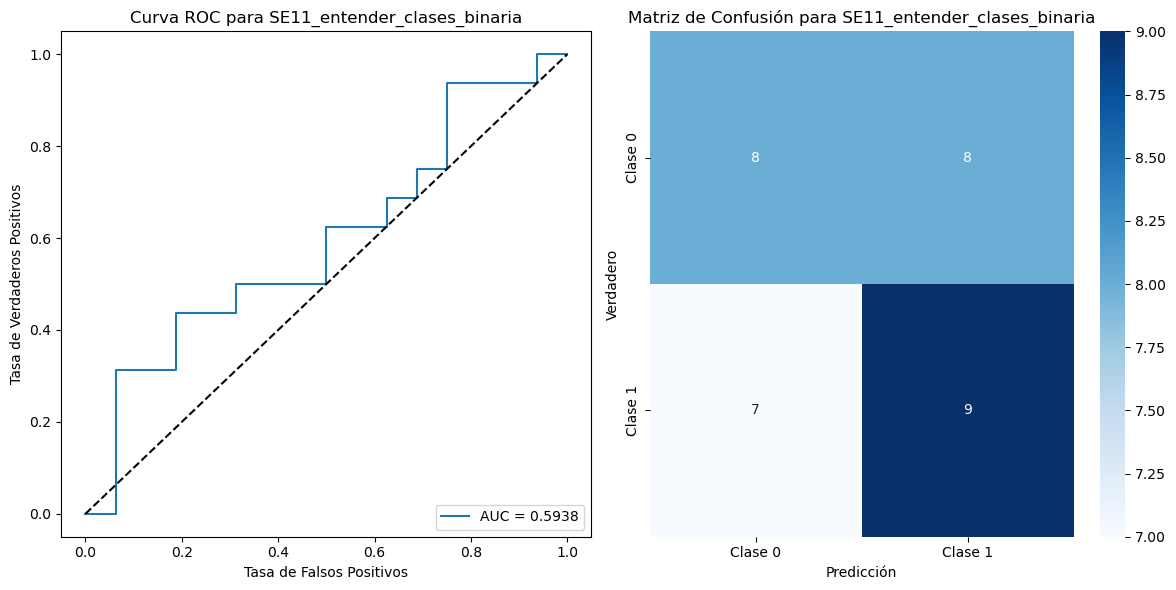

Distribución de y antes de train_test_split:
SE13_resiliencia_binaria
0    67
1    67
Name: count, dtype: int64
Reporte para SE13_resiliencia_binaria:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.44      0.31      0.36        13

    accuracy                           0.48        27
   macro avg       0.47      0.48      0.46        27
weighted avg       0.47      0.48      0.47        27

Área bajo la curva (AUC) para SE13_resiliencia_binaria: 0.5275
Matriz de confusión para SE13_resiliencia_binaria:
[[9 5]
 [9 4]]


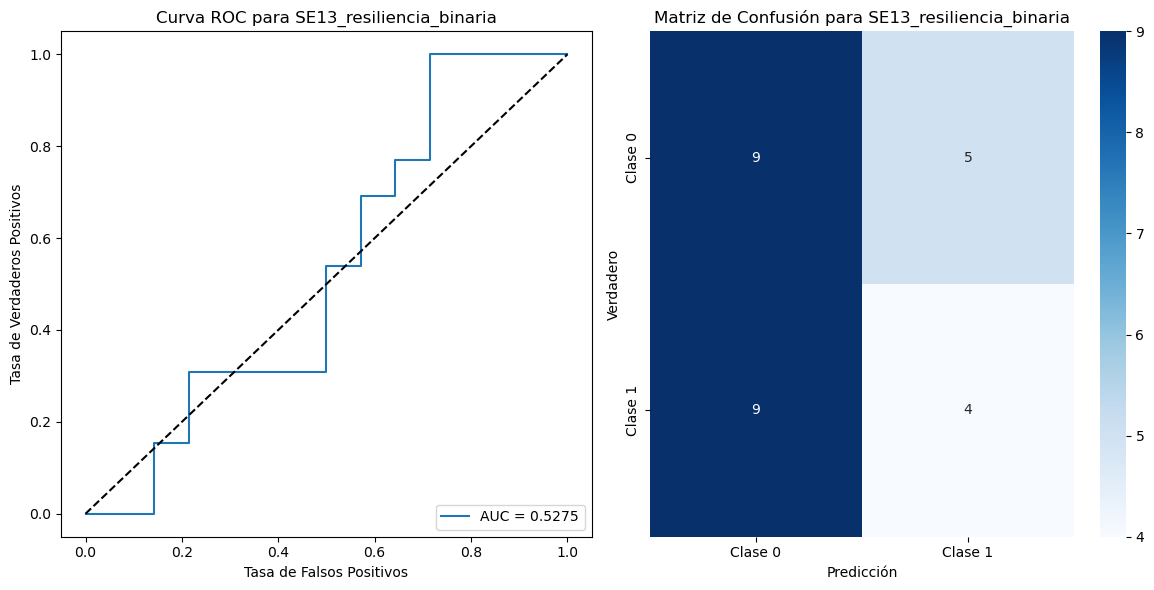

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que el dataframe 'df' ya esté cargado
# Creamos una lista de las variables a predecir
predictors = ['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4']
target_variables = [
    'SE01_conf_aprender_binaria', 'SE02_autonomia_aprender_binaria', 
    'SE14R_cuesta_ejercicios_binaria', 'SE03_resolver_ejercicios_binaria', 
    'SE04_estudiar_tiempo_necesario_binaria', 'SE15R_cuesta_clases_binaria', 
    'SE06_entender_compleja_binaria', 'SE08_buscar_ayuda_autonomia_binaria', 
    'SE09_conf_aprobar_binaria', 'SE10_identif_baches_binaria', 
    'SE16R_cuesta_comparacion_binaria', 'SE11_entender_clases_binaria', 
    'SE13_resiliencia_binaria'
]

# Iterar sobre cada una de las variables dependientes
for target in target_variables:
    df_copy = df.copy()
    
    # Eliminar valores nulos antes del balanceo
    df_copy = df_copy.dropna(subset=predictors + [target])
    
    group_0 = df_copy[df_copy[target] == 0]
    group_1 = df_copy[df_copy[target] == 1]
    
    n_min = min(len(group_0), len(group_1))
    
    group_0_resampled = resample(group_0, n_samples=n_min, random_state=120)
    group_1_resampled = resample(group_1, n_samples=n_min, random_state=120)
    
    df_balanced = pd.concat([group_0_resampled, group_1_resampled])
    
    X = df_balanced[predictors]
    y = df_balanced[target]
    
    # Verificar balance antes de train_test_split
    print(f'Distribución de y antes de train_test_split:\n{y.value_counts()}')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    print(f'Reporte para {target}:')
    print(classification_report(y_test, y_pred))
    
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f'Área bajo la curva (AUC) para {target}: {auc:.4f}')
    
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matriz de confusión para {target}:\n{cm}')
    
    # Graficar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC para {target}')
    plt.legend(loc='lower right')
    
    # Graficar la matriz de confusión
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusión para {target}')
    
    plt.tight_layout()
    plt.show()
